# <center> <h1>Final Project</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2021</h1> </center>
<center> <h1>Drew Strella</h1> </center>

Two major types of problems that machine learning algorithms try to solve are:

**Regression** — Predict continuous value of a given data point<br/>
**Classification** — Predict the class of the given data point<br/>

In you project, choose one type of problem and make sure to follow the steps listed below:

**Step-1 Problem Definition:**<br/>
Choose a problem whose data set is available. This problem should either fall into regression or classification group. You can choose one of the datasets that are listed below. You are also free to choose another dataset that you are familiar with. You must write a summary about the problem and the associated dataset. <br/>
**Step-2: Data Cleaning and Preprocessing:**<br/>
In this step, you must identify the relevant columns in the dataset that can be used as predictors. Any irrelevant data columns must be excluded from the analysis. If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in data info files or can be determined by inspection.  <br/>
**Step-3 (optional): Feature Extraction/Addition:**<br/>
In this step, additional features can be added to the existing dataset. The existing features can be altered in a way that can better serve for training the underlying model. You can skip this step if you think there is no room for extracting/adding extra features.<br/>
**Step-4: Data Scaling (optional):**<br/>
Transform your data so that it fits within a specific scale. For example standardization or normalization. You can skip this step if you think your dataset does not contain features highly varying in magnitudes, units and range.<br/>
**Step-5: Data Splitting:**<br/>
This step should start with creating two dataframes: response and features. Split these dataframes into train and test parts.<br/>
**Step-6: Model Selection, Model Fitting and Model Evaluation:**<br/>
Choose an appropriate model that can be used for your problem. You can choose a model that is listed under a given problem group below. You are also free to choose another model that you are familiar with. Fit your train data to your model. Generate predictions over the test data and then evaluate your model by reporting appropriate accuracy metrics.<br/>
**Step-7: Report Feature Importance:**<br/>
You must report the feature importance results.<br/>
**Step-8: Improve Your Results:**<br/>
Choose one or multiple different methods to improve your baseline results that you reported in the previous step. For example, you can enumerate multiple different models and recommend the one that gives the best accuracy metrics results. Or you can develop feature elimination strategy that yields better results. You are also free to choose another method that you are familiar with.<br/>

## Regression Problem
Models to consider:<br/>
**Multiple Linear Regression**<br/>
**Decision Trees**<br/>
**Random Forecast**<br/>
**Support Vector Machines**<br/>
Any other model that can be used for regression problem.<br/>

#### Example Data Sets for Regression Problem:
**1) Nba:** Predict the salary of an NBA player.<br/> 
Dowload link: https://sites.google.com/site/yasinunlu/home/research/new1/nba.csv<br/> 
**2) Automobile Data Set:** Predict car prices.<br/> 
Dowload link:https://sites.google.com/site/yasinunlu/home/research/new1/AutomobileDataSet.xlsx<br/> 
More info: https://sites.google.com/site/yasinunlu/home/research/new1/auto_prices_info.txt<br/>
**3) Auto Mpg:** Predict the mpg of an automobile.<br/> 
Dowload link:https://sites.google.com/site/yasinunlu/home/research/new1/mpg.zip

## Classification Problem
Models to consider:<br/>
**Logistic Regression**<br/>
**Decision Trees**<br/>
**Random Forest**<br/>
**Nearest Neighbor**<br/>
**Support Vector Machines**<br/>
**Naïve Bayes**<br/>
Any other model that can be used for classification problem.<br/>

#### Example Data Sets for Classification Problem:
**1) Titanic:** Predict whether a passenger survived.<br/> 
Dowload link: https://sites.google.com/site/yasinunlu/home/research/new1/Titanic_train.csv<br/>
**2) Iris:** Predict species name.<br/>
Download link: https://sites.google.com/site/yasinunlu/home/research/new1/iris.csv<br/>
**3) Adult:** Predict whether a person makes over 50K a year.<br/>
Download link: https://sites.google.com/site/yasinunlu/home/research/new1/adult.zip<br/>

The dataset NBA was used to solve the regression problem of predicting NBA players salaries, based on player features. The dadaset includes infor for individual players such as; Name, Team, Number, Position, Age, Height, Weight, College, and their corresponding Salary. I eliminated the Name and Number columns from this dataset as they were uncorrelated to the players salaries. I filled any missing values in the data I then converted the Height column to be in terms of inches, and encoded the features Team, Position, and College to be in terms of integers. I then split the data into features and response dataframes and trained the data to use the features to predict salaries. I then checked the importance of each feature and discovered that the Weight, and Age were the most important features, so I made a new dataframe with only those features and made new predictions. I found that my new predictions were indeed slightly better than they were when considering all of the other features.

In [1]:
import pandas as pd
nba_data = pd.read_csv('nba.csv')
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Height    457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [2]:
## I decided to drop the name and number categories, as the players name should have no merit on their salary in
#terms of this dataset. Also players usually are allowed to pick their number so I removed that as well.

df = nba_data.drop(labels = ['Name', 'Number'], axis = 1) 
    

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      457 non-null    object 
 1   Position  457 non-null    object 
 2   Age       457 non-null    int64  
 3   Height    457 non-null    object 
 4   Weight    457 non-null    int64  
 5   College   373 non-null    object 
 6   Salary    446 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 25.1+ KB


In [3]:
#Check for columns with missing values

bool_df = ~df.isna()
ps = bool_df.apply(any, axis = 1)
df = df[ps]
column_names = df.columns.to_list()
print('Columns that have missing values:')
for col_name in column_names:
    if(any(df[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')

Columns that have missing values:
College has a missing value.
Salary has a missing value.
End


In [4]:
College = len(df.College.unique().tolist())
Salary = len(df.Salary.unique().tolist())

print('College has '+str(College)+' different values.')
print('Salary has '+str(Salary)+' different values.')


College has 119 different values.
Salary has 310 different values.


In [5]:
#Replacing the missing College values with the most common one
most_one_College = df['College'].value_counts().idxmax() 
df['College'] = df['College'].fillna(most_one_College)


In [6]:
#Filling missing values for Salary
na_Salary = df.Salary.isna()
#mean and std of Salary
mean_Salary = df.Salary.mean()
std_Salary = df.Salary.std()
#how many NaNs
size_na_Salary = sum(na_Salary)

import numpy as np
ps_rand_Salary_array = np.random.randint(max(0, mean_Salary - std_Salary), mean_Salary + std_Salary, size = size_na_Salary)
ps_rand_Salary_array = ps_rand_Salary_array.astype(float)
df.loc[na_Salary, 'Salary'] = ps_rand_Salary_array

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      457 non-null    object 
 1   Position  457 non-null    object 
 2   Age       457 non-null    int64  
 3   Height    457 non-null    object 
 4   Weight    457 non-null    int64  
 5   College   457 non-null    object 
 6   Salary    457 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 28.6+ KB


In [8]:
#Checking for missing values again
bool_df = ~df.isna()
ps = bool_df.apply(any, axis = 1)
df = df[ps]
column_names = df.columns.to_list()
print('Columns that have missing values:')
for col_name in column_names:
    if(any(df[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')

Columns that have missing values:
End


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      457 non-null    object 
 1   Position  457 non-null    object 
 2   Age       457 non-null    int64  
 3   Height    457 non-null    object 
 4   Weight    457 non-null    int64  
 5   College   457 non-null    object 
 6   Salary    457 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 28.6+ KB


In [10]:
#Convert Height values to be in terms of inches, which is more useful for this dataset
nba_new = df.copy() 
myListFeetInches = []

for element in nba_new['Height']:
    k = str(element)
    feet = k[0]
    inches = k[2:]
    feetInches = 12*int(feet)+ int(inches)
    myListFeetInches.append(feetInches)
    


nba_new[['Height (inches)']] =  pd.DataFrame(myListFeetInches) #create the new column with the associated list

#I mived the new Height column to the first row to keep 'Salary' as the last row

nba_new = nba_new.drop(labels = ['Height'], axis = 1) 
first_column = nba_new.pop('Height (inches)')
nba_new.insert(0, 'Height (inches)', first_column)
nba_new
nba_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Height (inches)  457 non-null    int64  
 1   Team             457 non-null    object 
 2   Position         457 non-null    object 
 3   Age              457 non-null    int64  
 4   Weight           457 non-null    int64  
 5   College          457 non-null    object 
 6   Salary           457 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 28.6+ KB


In [11]:
#Change the columns containing objects to integers
from sklearn.preprocessing import LabelEncoder
df_clean = nba_new.copy() 
labelencoder = LabelEncoder()
df_clean['Team'] = labelencoder.fit_transform(df['Team'])
df_clean['Position'] = labelencoder.fit_transform(df['Position'])
df_clean['College'] = labelencoder.fit_transform(df['College'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Height (inches)  457 non-null    int64  
 1   Team             457 non-null    int32  
 2   Position         457 non-null    int32  
 3   Age              457 non-null    int64  
 4   Weight           457 non-null    int64  
 5   College          457 non-null    int32  
 6   Salary           457 non-null    float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 23.2 KB


In [12]:
df_clean.head()
# df_clean2=df_clean

,Height (inches),Team,Position,Age,Weight,College,Salary
0,74,1,2,25,180,93,7730337.0
1,78,1,3,25,235,52,6796117.0
2,77,1,4,27,205,8,5616999.0
3,77,1,4,22,185,33,1148640.0
4,82,1,1,29,231,45,5000000.0


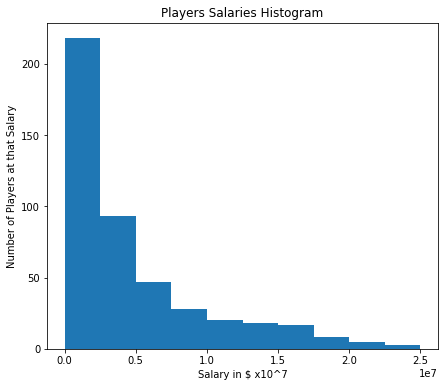

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.hist(df_clean['Salary'])
plt.title('Players Salaries Histogram')
plt.xlabel('Salary in $ x10^7')
plt.ylabel('Number of Players at that Salary')
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(df_clean)
df_normalized = pd.DataFrame(data_normalized, columns = df_clean.columns.to_list())
df_normalized.head()

,Height (inches),Team,Position,Age,Weight,College,Salary
0,0.277778,0.034483,0.50,0.285714,0.130137,0.794872,0.308359
1,0.500000,0.034483,0.75,0.285714,0.506849,0.444444,0.270944
2,0.444444,0.034483,1.00,0.380952,0.301370,0.068376,0.223721
3,0.444444,0.034483,1.00,0.142857,0.164384,0.282051,0.044765
4,0.722222,0.034483,0.25,0.476190,0.479452,0.384615,0.199010


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_standardized = scaler.fit_transform(df_clean)
df_clean = pd.DataFrame(data_standardized, columns = df_clean.columns.to_list())
df_clean.head()

,Height (inches),Team,Position,Age,Weight,College,Salary
0,-1.516410,-1.573667,-0.051381,-0.440701,-1.576454,1.267612,0.561957
1,-0.365726,-1.573667,0.660170,-0.440701,0.511666,-0.109591,0.381707
2,-0.653397,-1.573667,1.371722,0.013927,-0.627308,-1.587566,0.154206
3,-0.653397,-1.573667,1.371722,-1.122644,-1.386625,-0.747807,-0.707928
4,0.784958,-1.573667,-0.762933,0.468556,0.359803,-0.344723,0.035161


In [16]:
#Split data into features and response
from sklearn.model_selection import train_test_split
features = df_normalized.iloc[:,0:6] 
features.head() 

,Height (inches),Team,Position,Age,Weight,College
0,0.277778,0.034483,0.50,0.285714,0.130137,0.794872
1,0.500000,0.034483,0.75,0.285714,0.506849,0.444444
2,0.444444,0.034483,1.00,0.380952,0.301370,0.068376
3,0.444444,0.034483,1.00,0.142857,0.164384,0.282051
4,0.722222,0.034483,0.25,0.476190,0.479452,0.384615


In [17]:
response = df_normalized[['Salary']] #create a dataframe for response variable
response.head()

,Salary
0,0.308359
1,0.270944
2,0.223721
3,0.044765
4,0.199010


In [18]:
my_result_list = train_test_split(features, response, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

In [19]:
print("Number of total rows in complete features dataframe: ", len(features))
print("Number of total rows in features_train dataframe: ", len(features_train))
print("Number of total rows in features_test dataframe: ", len(features_test))
print("Number of total rows in complete response dataframe: ", len(response))
print("Number of total rows in response_train dataframe: ", len(response_train))
print("Number of total rows in response_test dataframe: ", len(response_test))

Number of total rows in complete features dataframe:  457
Number of total rows in features_train dataframe:  342
Number of total rows in features_test dataframe:  115
Number of total rows in complete response dataframe:  457
Number of total rows in response_train dataframe:  342
Number of total rows in response_test dataframe:  115


In [20]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
response_pred = my_linear_regression.predict(features_test)

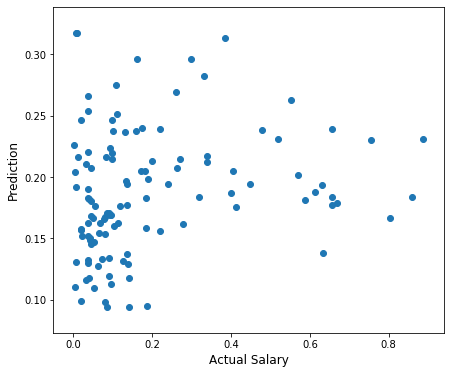

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.scatter(response_test, response_pred)
plt.ylabel('Prediction', size = 12)
plt.xlabel('Actual Salary', size = 12)
plt.show()

In [23]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

Mean Absolute Error: 0.15220411836393277
Mean Squared Error: 0.0441964854167076
Root Mean Squared Error: 0.21022960166614882


In [24]:
df_normalized.head()

,Height (inches),Team,Position,Age,Weight,College,Salary
0,0.277778,0.034483,0.50,0.285714,0.130137,0.794872,0.308359
1,0.500000,0.034483,0.75,0.285714,0.506849,0.444444,0.270944
2,0.444444,0.034483,1.00,0.380952,0.301370,0.068376,0.223721
3,0.444444,0.034483,1.00,0.142857,0.164384,0.282051,0.044765
4,0.722222,0.034483,0.25,0.476190,0.479452,0.384615,0.199010


In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# data_standardized = scaler.fit_transform(df_clean)

In [26]:
# df_standardized = pd.DataFrame(data_standardized, columns = df_clean.columns.to_list())
# df_standardized.head()

In [27]:
print("Mean: ")
print(df_normalized.mean())
print()
print("Variance: ")
print(df_normalized.var())

Mean: 
Height (inches)    0.570630
Team               0.500717
Position           0.518053
Age                0.378035
Weight             0.414541
College            0.472330
Salary             0.191712
dtype: float64

Variance: 
Height (inches)    0.037378
Team               0.087970
Position           0.123714
Age                0.043980
Weight             0.032618
College            0.064886
Salary             0.043181
dtype: float64


In [28]:
df_normalized.head()

,Height (inches),Team,Position,Age,Weight,College,Salary
0,0.277778,0.034483,0.50,0.285714,0.130137,0.794872,0.308359
1,0.500000,0.034483,0.75,0.285714,0.506849,0.444444,0.270944
2,0.444444,0.034483,1.00,0.380952,0.301370,0.068376,0.223721
3,0.444444,0.034483,1.00,0.142857,0.164384,0.282051,0.044765
4,0.722222,0.034483,0.25,0.476190,0.479452,0.384615,0.199010


In [29]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
features = df_normalized.iloc[:,0:6] #First 6 columns in dataframe accounts for features
response = df_normalized[['Salary']]
my_linear_regression.fit(features, response) #first input is features, second input is response

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
importance = my_linear_regression.coef_[0]
feature_names = df_normalized.columns.to_list()
feature_names.remove('Salary')
# summarize feature importance
for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

Height (inches): -0.13010
Team: -0.01924
Position: -0.01812
Age: 0.18928
Weight: 0.23706
College: 0.00927


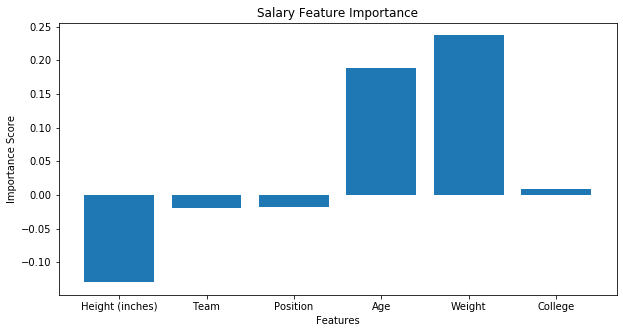

In [31]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Salary Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

In [32]:
df_clean.head()

,Height (inches),Team,Position,Age,Weight,College,Salary
0,-1.516410,-1.573667,-0.051381,-0.440701,-1.576454,1.267612,0.561957
1,-0.365726,-1.573667,0.660170,-0.440701,0.511666,-0.109591,0.381707
2,-0.653397,-1.573667,1.371722,0.013927,-0.627308,-1.587566,0.154206
3,-0.653397,-1.573667,1.371722,-1.122644,-1.386625,-0.747807,-0.707928
4,0.784958,-1.573667,-0.762933,0.468556,0.359803,-0.344723,0.035161


In [33]:
#I am trying to improve my model by removing the features that proved to be of little importance to the prediction
df_normalized2 = df_normalized.drop(labels = ['Height (inches)', 'Team', 'Position', 'College'], axis = 1) 
df_normalized2.head()

,Age,Weight,Salary
0,0.285714,0.130137,0.308359
1,0.285714,0.506849,0.270944
2,0.380952,0.301370,0.223721
3,0.142857,0.164384,0.044765
4,0.476190,0.479452,0.199010


In [34]:
#Split data into features and response
from sklearn.model_selection import train_test_split
features = df_normalized2.iloc[:,0:2] 
features.head() 

,Age,Weight
0,0.285714,0.130137
1,0.285714,0.506849
2,0.380952,0.301370
3,0.142857,0.164384
4,0.476190,0.479452


In [35]:
response = df_normalized2[['Salary']] #create a dataframe for response variable
response.head()

,Salary
0,0.308359
1,0.270944
2,0.223721
3,0.044765
4,0.199010


In [36]:
my_result_list = train_test_split(features, response, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

In [37]:
print("Number of total rows in complete features dataframe: ", len(features))
print("Number of total rows in features_train dataframe: ", len(features_train))
print("Number of total rows in features_test dataframe: ", len(features_test))
print("Number of total rows in complete response dataframe: ", len(response))
print("Number of total rows in response_train dataframe: ", len(response_train))
print("Number of total rows in response_test dataframe: ", len(response_test))

Number of total rows in complete features dataframe:  457
Number of total rows in features_train dataframe:  342
Number of total rows in features_test dataframe:  115
Number of total rows in complete response dataframe:  457
Number of total rows in response_train dataframe:  342
Number of total rows in response_test dataframe:  115


In [38]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
response_pred = my_linear_regression.predict(features_test)

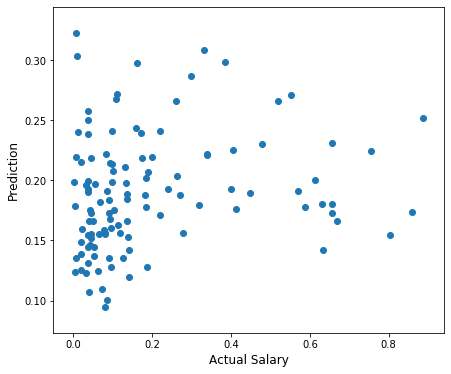

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.scatter(response_test, response_pred)
plt.ylabel('Prediction', size = 12)
plt.xlabel('Actual Salary', size = 12)
plt.show()

In [41]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

#The error here is slightly reduced due to removing the features that turned out to be less corolational

Mean Absolute Error: 0.1526815360887418
Mean Squared Error: 0.0443716846133291
Root Mean Squared Error: 0.21064587490223752


In [42]:
print("Mean: ")
print(df_normalized2.mean())
print()
print("Variance: ")
print(df_normalized2.var())

Mean: 
Age       0.378035
Weight    0.414541
Salary    0.191712
dtype: float64

Variance: 
Age       0.043980
Weight    0.032618
Salary    0.043181
dtype: float64


In [43]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
features = df_normalized2.iloc[:,0:2]
response = df_normalized2[['Salary']]
my_linear_regression.fit(features, response)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
importance = my_linear_regression.coef_[0]
feature_names = df_normalized2.columns.to_list()
feature_names.remove('Salary')
# summarize feature importance
for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

Age: 0.19967
Weight: 0.14063


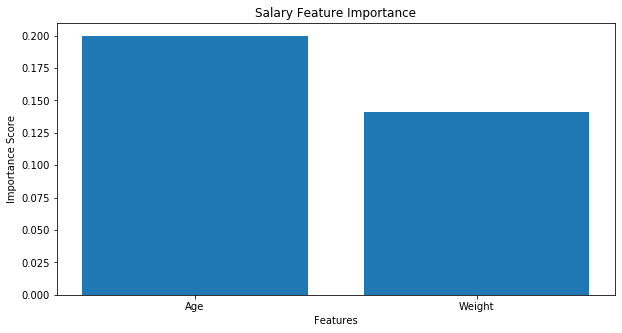

In [45]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Salary Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()